In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 


In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.822399,0.665621,-5.295150e-07,0.689069,0.621707,0.034117,0.583175,0.558409,0.019959,0.495794,...,0.586679,0.391082,-0.171000,0.511546,0.378025,-0.187798,0.448738,0.363857,-0.198877,C
1,0.820108,0.668900,-5.243592e-07,0.684963,0.618442,0.037444,0.576353,0.554405,0.025390,0.489816,...,0.583348,0.393620,-0.163274,0.507079,0.381318,-0.182033,0.441313,0.366678,-0.195414,C
2,0.821911,0.668146,-5.940108e-07,0.682654,0.622319,0.033697,0.575033,0.556313,0.021600,0.488915,...,0.585484,0.391370,-0.165186,0.509552,0.381633,-0.184569,0.445660,0.368287,-0.197580,C
3,0.816287,0.666865,-5.775411e-07,0.682369,0.613530,0.050206,0.579258,0.550252,0.041152,0.496256,...,0.589329,0.388678,-0.188292,0.512595,0.377443,-0.206732,0.449172,0.362199,-0.220825,C
4,0.819335,0.670045,-6.265192e-07,0.680603,0.620621,0.040208,0.574658,0.554637,0.030487,0.491010,...,0.585649,0.390520,-0.175373,0.509655,0.379934,-0.194792,0.446902,0.367022,-0.207198,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.559484,0.968917,-1.118179e-06,0.429346,0.875418,-0.050334,0.346565,0.666748,-0.070967,0.323877,...,0.741760,0.443058,-0.072315,0.752781,0.347726,-0.074301,0.757529,0.256718,-0.061192,y
1995,0.558094,0.972448,-1.096000e-06,0.430194,0.882443,-0.053121,0.347073,0.674382,-0.076207,0.324591,...,0.742308,0.446846,-0.072531,0.754332,0.351237,-0.073573,0.760957,0.263245,-0.060626,y
1996,0.561755,0.983118,-1.184554e-06,0.433782,0.888235,-0.047671,0.351131,0.677124,-0.068460,0.328741,...,0.744219,0.457717,-0.073655,0.754543,0.363700,-0.072564,0.758784,0.272513,-0.057501,y
1997,0.559852,0.982790,-1.169062e-06,0.433766,0.884016,-0.048487,0.352088,0.677283,-0.070633,0.329981,...,0.744524,0.459523,-0.075603,0.756035,0.364813,-0.075147,0.761420,0.273721,-0.060643,y


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.822399,0.665621,-5.295150e-07,0.689069,0.621707,0.034117,0.583175,0.558409,0.019959,0.495794,...,0.586679,0.391082,-0.171000,0.511546,0.378025,-0.187798,0.448738,0.363857,-0.198877,C
1,0.820108,0.668900,-5.243592e-07,0.684963,0.618442,0.037444,0.576353,0.554405,0.025390,0.489816,...,0.583348,0.393620,-0.163274,0.507079,0.381318,-0.182033,0.441313,0.366678,-0.195414,C
2,0.821911,0.668146,-5.940108e-07,0.682654,0.622319,0.033697,0.575033,0.556313,0.021600,0.488915,...,0.585484,0.391370,-0.165186,0.509552,0.381633,-0.184569,0.445660,0.368287,-0.197580,C
3,0.816287,0.666865,-5.775411e-07,0.682369,0.613530,0.050206,0.579258,0.550252,0.041152,0.496256,...,0.589329,0.388678,-0.188292,0.512595,0.377443,-0.206732,0.449172,0.362199,-0.220825,C
4,0.819335,0.670045,-6.265192e-07,0.680603,0.620621,0.040208,0.574658,0.554637,0.030487,0.491010,...,0.585649,0.390520,-0.175373,0.509655,0.379934,-0.194792,0.446902,0.367022,-0.207198,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.559484,0.968917,-1.118179e-06,0.429346,0.875418,-0.050334,0.346565,0.666748,-0.070967,0.323877,...,0.741760,0.443058,-0.072315,0.752781,0.347726,-0.074301,0.757529,0.256718,-0.061192,y
1995,0.558094,0.972448,-1.096000e-06,0.430194,0.882443,-0.053121,0.347073,0.674382,-0.076207,0.324591,...,0.742308,0.446846,-0.072531,0.754332,0.351237,-0.073573,0.760957,0.263245,-0.060626,y
1996,0.561755,0.983118,-1.184554e-06,0.433782,0.888235,-0.047671,0.351131,0.677124,-0.068460,0.328741,...,0.744219,0.457717,-0.073655,0.754543,0.363700,-0.072564,0.758784,0.272513,-0.057501,y
1997,0.559852,0.982790,-1.169062e-06,0.433766,0.884016,-0.048487,0.352088,0.677283,-0.070633,0.329981,...,0.744524,0.459523,-0.075603,0.756035,0.364813,-0.075147,0.761420,0.273721,-0.060643,y


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1999, 63)
Labels shape = (1999,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['M', 'please', 'please', 'please', 'please', 'talk', 'please',
       'please', 'please', 'C', 'super', 'Q', 'i', 'help', 'please',
       'please', 'M', 'y', 'morning', 'please', 'y', 'Q', 'super', 'U',
       'Q', 'U', 'M', 'Q', 'morning', 'S', 'please', 'please', 'y',
       'please', 'R', 'M', 'S', 'help', 'M', 'please', 'C', 'S', 'super',
       'C', 'please', 'morning', 'please', 'i', 'U', 'please', 'U',
       'please', 'C', 'morning', 'i', 'Q', 'M', 'please', 'super',
       'please', 'please', 'U', 'please', 'Q', 'C', 'please', 'Q',
       'please', 'morning', 'please', 'i', 'Q', 'why', 'talk', 'please',
       'V', 'help', 'please', 'please', 'please', 'R', 'help', 'please',
       'S', 'V', 'i', 'V', 'i', 'M', 'please', 'C', 'please', 'help',
       'today', 'U', 'V', 'y', 'C', 'why', 'i', 'U', 'morning', 'morning',
       'R', 'C', 'why', 'today', 'S', 'please', 'today', 'I love you',
       'why', 'today', 'R', 'U', 'y', 'y', 'C', 'please', 'C', 'V', 'C',
       'Q'

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.785, 0.785, 0.785)

In [8]:
x = metrics.accuracy_score(y_test, y_pred)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test, y_pred))

DecisionTrees's Accuracy is:  78.5
              precision    recall  f1-score   support

           C       1.00      1.00      1.00        28
  I love you       1.00      0.24      0.38        17
           M       1.00      1.00      1.00        20
           Q       1.00      1.00      1.00        17
           R       1.00      1.00      1.00        19
           S       1.00      0.95      0.97        20
           U       1.00      1.00      1.00        18
           V       1.00      1.00      1.00        20
        help       1.00      0.83      0.91        18
           i       1.00      1.00      1.00        23
     morning       1.00      1.00      1.00        24
          ok       0.00      0.00      0.00        20
        play       1.00      0.18      0.30        17
      please       0.17      1.00      0.30        18
       super       1.00      1.00      1.00        17
        talk       1.00      0.26      0.42        19
       today       1.00      1.00      1.00   

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

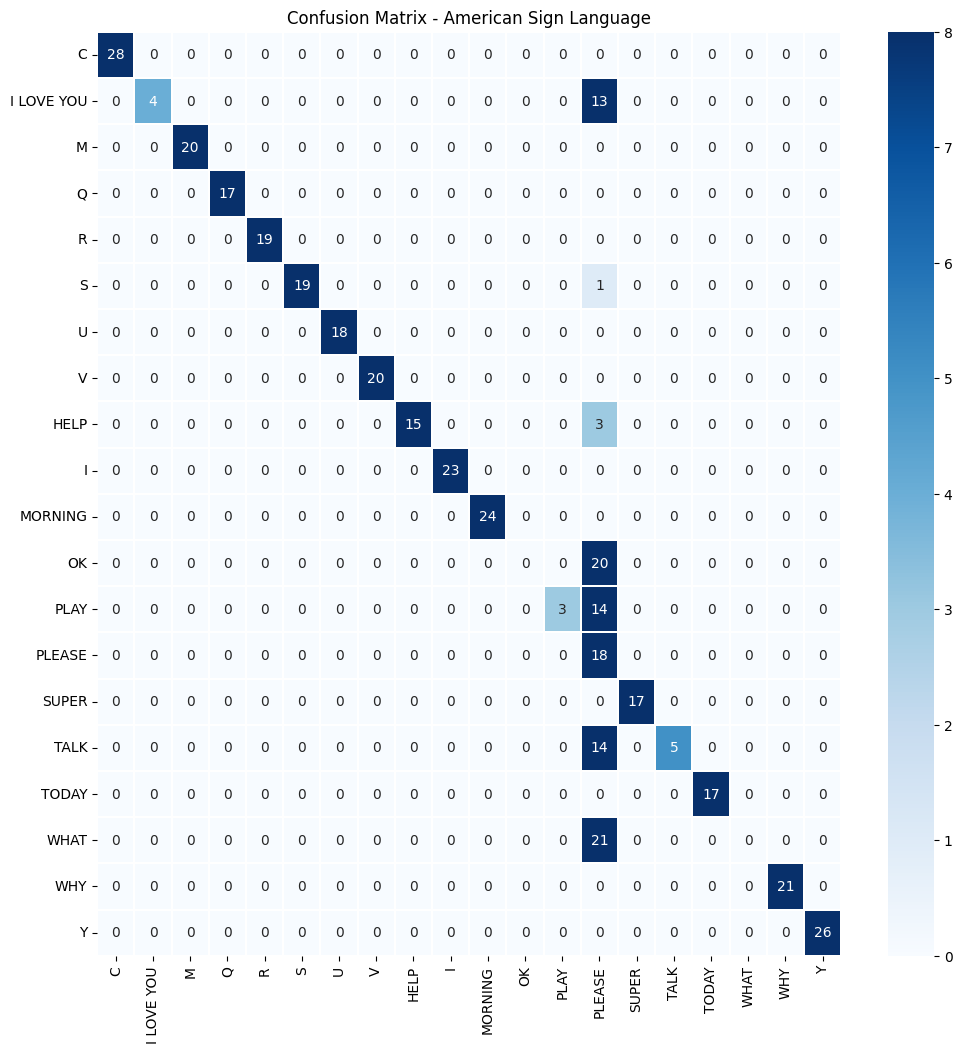

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)